# Analysing ultrasound beacons in the wild

In [1]:
from scipy.io.wavfile import read as wavread
import matplotlib.pyplot as plt
import numpy as np

## Let's open the signal

In [2]:
audiofilename = "starbuckmontpar.wav"
[samplerate, x] = wavread(audiofilename) # x is a numpy array of integer, representing the samples 
# scale to -1.0 -- 1.0
if x.dtype == 'int16':
    nb_bits = 16 # -> 16-bit wav files
elif x.dtype == 'int32':
    nb_bits = 32 # -> 32-bit wav files
max_nb_bit = float(2 ** (nb_bits - 1))
samples = x / (max_nb_bit + 1.0) # samples is a numpy array of float representing the samples 

## Let's plot the signal

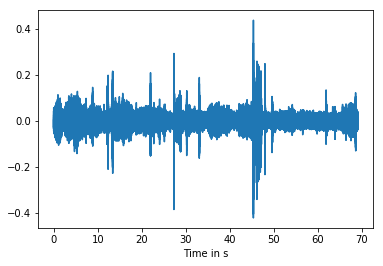

In [3]:
t = range(len(x))
for k in range(len(x)):
    t[k] = 1.0*t[k] / samplerate
plt.plot(t,samples)  # let's plot the sound
plt.xlabel("Time in s")
plt.show()

#### FFT analysis


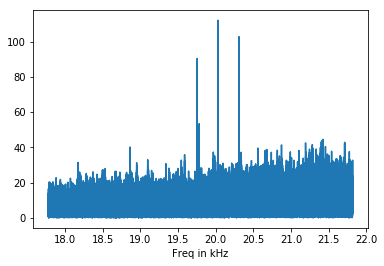

In [4]:
# Let's get the signal around 20khz:
A = np.fft.fft(samples)
f = range(len(x))
for k in range(len(x)):
    f[k] = 1.0e-3*f[k]*samplerate/len(x)
L = len(A)
plt.plot(f[int(L/2.7):int(L/2.2)],np.abs(A)[int(L/2.7):int(L/2.2)])  
plt.xlabel("Freq in kHz")
plt.show()

#### We observe a peak at 20khz, with symetrical peaks around - right what we were looking for !
